In [1]:
import os
training_data = os.listdir('train')
print(len(training_data))

25000


In [2]:
labels = []
for i in training_data:
    if 'cat' in i:
        labels.append(0)
    else:
        labels.append(1)



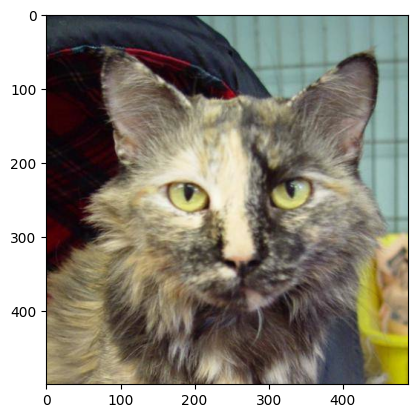

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

cat_imgae = pltimg.imread("train/cat.10.jpg")
plt.imshow(cat_imgae)



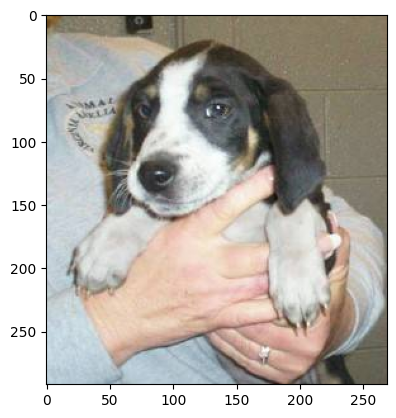

In [4]:
dog_image = pltimg.imread("train/dog.10.jpg")
plt.imshow(dog_image)

In [5]:
import PIL

for file_name in training_data:
    img = PIL.Image.open('train/' + file_name)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    img.save('resized/' + file_name)

In [48]:
import cv2
import numpy as np

cat_dog_images = []

for file_name in training_data:
    img = cv2.imread('resized/' + file_name)

    cat_dog_images.append(img)

cat_dog_images = np.asarray(cat_dog_images)


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneo

In [52]:
from sklearn.model_selection import train_test_split

labels = np.asarray(labels)

x_train, x_test, y_train, y_test = train_test_split(cat_dog_images, labels, test_size = 0.2, random_state = 2)

x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [54]:
import tensorflow as tf
import tensorflow_hub as hub


mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [55]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [56]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [57]:
model.fit(x_train_scaled, y_train, epochs = 5)

: 

: 